In [2]:
import time
import numpy as np
import scipy
import os
%matplotlib inline
import matplotlib.pyplot as plt

import skimage as ski
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage import img_as_float
from skimage import exposure
from PIL import Image

http://scikit-image.org/

#### Load image

In [3]:
ori_image = io.imread('Data/train001/13_left.jpeg')
ori_image.shape

(1944, 2592, 3)

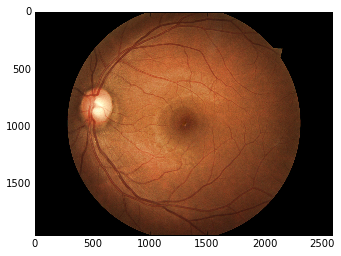

In [4]:
plt.imshow(ori_image)
plt.show()

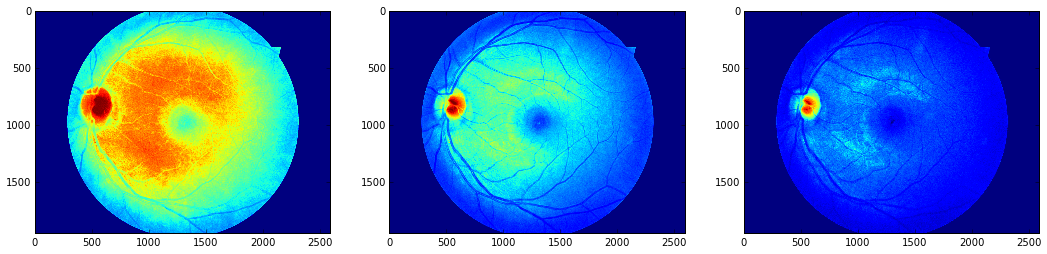

In [5]:
fig, ax = plt.subplots(1,3,figsize=(18,4))
for i in range(3):
    ax[i].imshow(ori_image[:,:,i])#, cmap=plt.cm.gray)
plt.show()

#### Gray scale

(1944, 2592)


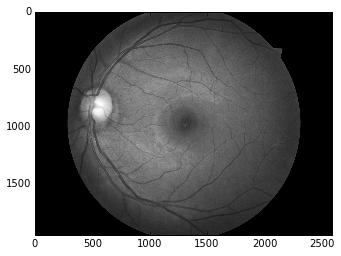

In [6]:
image = rgb2gray(ori_image)
print image.shape

plt.imshow(image, cmap=plt.cm.gray)
plt.show() 

#### Re-size

(127, 192)


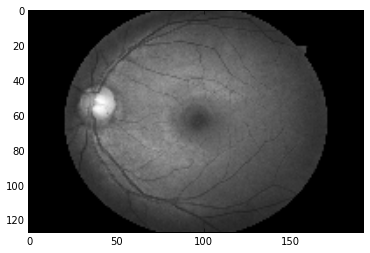

In [41]:
output_shape = (254/2, 384/2)
image2 = resize(image, output_shape)
print image2.shape

plt.imshow(image2, cmap=plt.cm.gray)
plt.show() 

#### Histogram Equalization

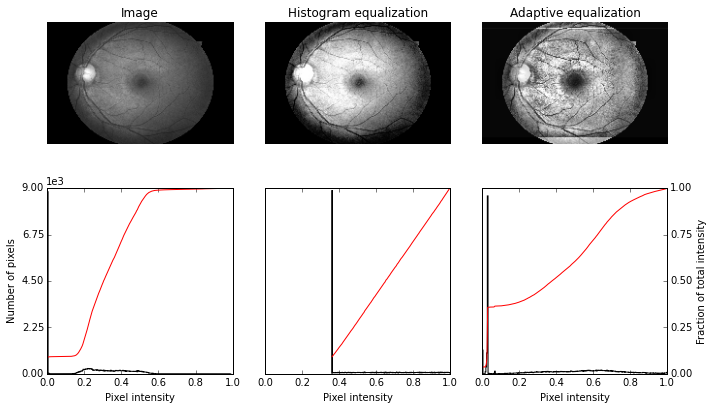

In [42]:
def plot_img_and_hist(img, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram."""
    img = img_as_float(img)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(img, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(img, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

# Equalization
img_eq = exposure.equalize_hist(image2)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(image2, clip_limit=0.03)

# Display results
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(image2, axes[:, 0])
ax_img.set_title('Image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 1])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 2])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

plt.tight_layout()
plt.show()

(127, 192)


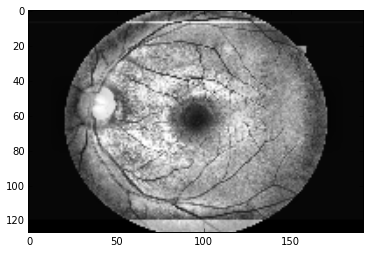

In [43]:
# Clipping limit, normalized between 0 and 1 (higher values give more contrast).
img_adapteq = exposure.equalize_adapthist(image2, clip_limit=0.03)
print img_adapteq.shape

plt.imshow(img_adapteq, cmap=plt.cm.gray)
plt.show() 

#### save image

In [44]:
io.imsave('Data/train001_processed/13_left_verysmall.jpeg', img_adapteq/65535.)

#### Some other examples

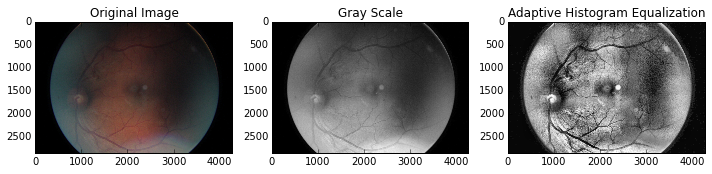

In [10]:
image2 = io.imread('Data/train001/1119_right.jpeg')
image2_gray = rgb2gray(image2)
image2_adapteq = exposure.equalize_adapthist(image2_gray, clip_limit=0.03)

fig, ax = plt.subplots(1,3,figsize=(12,4))
ax[0].imshow(image2)
ax[0].set_title("Original Image")
ax[1].imshow(image2_gray, cmap=plt.cm.gray)
ax[1].set_title("Gray Scale")
ax[2].imshow(image2_adapteq, cmap=plt.cm.gray)
ax[2].set_title("Adaptive Histogram Equalization")
plt.show() 

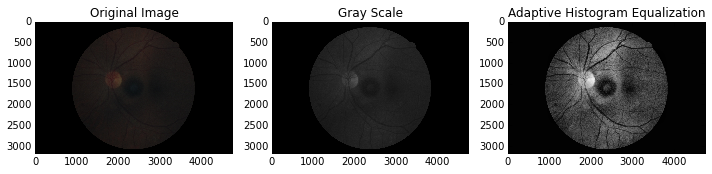

In [11]:
image3 = io.imread('Data/train001/1178_left.jpeg')
image3_gray = rgb2gray(image3)
image3_adapteq = exposure.equalize_adapthist(image3_gray, clip_limit=0.03)

fig, ax = plt.subplots(1,3,figsize=(12,4))
ax[0].imshow(image3)
ax[0].set_title("Original Image")
ax[1].imshow(image3_gray, cmap=plt.cm.gray)
ax[1].set_title("Gray Scale")
ax[2].imshow(image3_adapteq, cmap=plt.cm.gray)
ax[2].set_title("Adaptive Histogram Equalization")
plt.show() 